Using PBCpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os 
import sys
import subprocess
from numpy import linalg as la
import math

from ase import Atoms
from pbcpy.base import DirectCell, ReciprocalCell
from pbcpy.base import Coord
from pbcpy.grid import DirectGrid

In [2]:
### Keep a list of the total 64 coordinates and atoms 
### YOu should have the jobfile for ADF and the totalwater.txt one up folder

sym = []
x = []
y = []
z = []
c = []

with open('./IP/69/wat_ase69.xyz', 'r') as data:
    wat = [line.rstrip('\n') for line in data]
    for row in wat:
        line = row.split()
        sym.append(str(line[0]))
        x.append(float(line[1]))
        y.append(float(line[2]))
        z.append(float(line[3]))
        c.append(line)
        
#### Creating a list with the coordinates
### 207 # total of atoms
i = 0
k = []
while (i < 207):
    pos = [x[i],y[i],z[i]]
    k.append(pos)
    i += 1
#print(k)

####Define the lattice

lattice = np.identity(3)*np.array([[15.555,0.0,0.0],[0.0,14.9655,0.0],[0.0,0.0,15.2856]])
cell1 = DirectCell(lattice=lattice, origin=[20.0678, 20.967799999999997, 18.4378])

In [3]:
grid1 = DirectGrid(lattice=lattice, nr=[172,172,172],
                   origin=[20.0678, 20.967799999999997, 18.4378])

get_cut

In [4]:
print(grid1.r)
print(grid1.nnr)
print(Coord(pos=k[0], cell=cell1))

[[[[ 0.          0.          0.        ]
   [ 0.          0.          0.08886977]
   [ 0.          0.          0.17773953]
   ...
   [ 0.          0.         15.0189907 ]
   [ 0.          0.         15.10786047]
   [ 0.          0.         15.19673023]]

  [[ 0.          0.08700872  0.        ]
   [ 0.          0.08700872  0.08886977]
   [ 0.          0.08700872  0.17773953]
   ...
   [ 0.          0.08700872 15.0189907 ]
   [ 0.          0.08700872 15.10786047]
   [ 0.          0.08700872 15.19673023]]

  [[ 0.          0.17401744  0.        ]
   [ 0.          0.17401744  0.08886977]
   [ 0.          0.17401744  0.17773953]
   ...
   [ 0.          0.17401744 15.0189907 ]
   [ 0.          0.17401744 15.10786047]
   [ 0.          0.17401744 15.19673023]]

  ...

  [[ 0.         14.70447384  0.        ]
   [ 0.         14.70447384  0.08886977]
   [ 0.         14.70447384  0.17773953]
   ...
   [ 0.         14.70447384 15.0189907 ]
   [ 0.         14.70447384 15.10786047]
   [ 0.         

1.

Using DFTpy


In [5]:
sys.path.append('/home/jam1042/dftpy/src')
data = '/home/jam1042/dftpy/examples/DATA/'

In [6]:
from dftpy.field import *
from dftpy.grid import *
from dftpy.functionals import FunctionalClass, TotalEnergyAndPotential
from dftpy.pseudo import LocalPseudo
from dftpy.formats import io
from dftpy.math_utils import TimeData, bestFFTsize
from dftpy.optimization import Optimization
from dftpy.constants import LEN_CONV, ENERGY_CONV
from dftpy.system import System

Use "numpy" for Fourier Transform


Function to make a grid

In [7]:
def MakeGrid(metric,gap):
    nr = np.zeros(3, dtype = 'int32')
    for i in range(3):
        nr[i] = int(np.sqrt(metric[i, i])/gap)
    print('The initial grid size is ', nr)
    for i in range(3):
        nr[i] = bestFFTsize(nr[i])
    print('The final grid size is ', nr)
    grid = DirectGrid(lattice=lattice, nr=nr, units=None, full=False)
    return grid

In [8]:
import numpy as np
import  matplotlib.pyplot as plt
from pbcpy.formats.qepp import PP
from pbcpy.grid import DirectGrid
from pbcpy.base import DirectCell
from pbcpy.field import DirectField

In [10]:
ppfile = "./IP/69/water0/eqe/neutral/water-69_embedpot_MT_0_alpha.pp" #Anion
ppfile1 = "./IP/69/water0/eqe/charged/water-69_embedpot_MT_0_alpha.pp" #Cation

water_0 = PP(ppfile).read()
water_1 = PP(ppfile1).read()

rho = water_0.field
rho1 = water_1.field

o_pos = water_0.ions[0].pos
h1_pos = water_0.ions[1].pos
h2_pos = water_0.ions[2].pos

o_h1_vec = o_pos.d_mic(h1_pos)
o_h2_vec = o_pos.d_mic(h2_pos)


In [11]:
#getting the 1D/2D/3D Cuts of the scalar field using vectors
#get_cut(r0, [r1], [r2], [origin], [center], [nr])

rho_cut = rho.get_cut(r0=o_h1_vec*4, r1=o_h2_vec*4, center=o_pos, nr=[250,250])
rho_cut2 = rho1.get_cut(r0=o_h1_vec*4, r1=o_h2_vec*4, center=o_pos, nr=[250,250])


In [17]:
pos=np.array(rho_cut.shape)//2
cut_half = rho_cut[pos[0],pos[1]]

In [18]:
cut_half

DirectField([[0.22269218]])

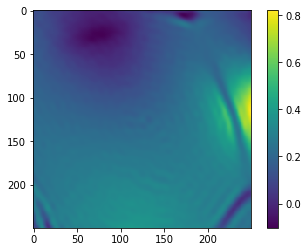

In [20]:
rho_cutr=np.reshape(rho_cut,(250,250))

plt.imshow(rho_cutr)

plt.colorbar()